In [2]:
import numpy as np
import helper_functions as functions
import json

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

from collections import Counter
import random
#import texthero as hero


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

from numpy import mean
from numpy import std

from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_extraction.text import CountVectorizer


from sklearn.manifold import TSNE
import matplotlib.cm as cm

In [3]:
with open('young_subjects_full_study_json_list_march23.json', "r") as read_file:
    data_json_list = json.load(read_file)

In [4]:
len(data_json_list)

17335

In [5]:
print(data_json_list[0])

{'subjectIndex': 63, 'sessionIndex': 1, 'listIndex': 0, 'listLength_studyPhase': 16, 'listLength_recallPhase': 7, 'wordIndices_studyPhase': [737, 203, 913, 382, 31, 733, 1618, 391, 1171, 1258, 931, 1221, 1372, 291, 1550, 1279], 'serialPositions_studyPhase': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'actualWords_studyPhase': ['INFANT', 'BUTCHER', 'MONUMENT', 'CORPORATION', 'APE', 'IDOL', 'WITNESS', 'COURT', 'RAZOR', 'SCULPTURE', 'MULE', 'SADDLE', 'STAPLER', 'CHEMICAL', 'VAULT', 'SHEET'], 'wordIndices_recallPhase': [1279, 291, 1618, 203, 913, 737, 1258], 'serialPositions_recallPhase': [15, 13, 6, 1, 2, 0, 9], 'actualWords_recallPhase': ['SHEET', 'CHEMICAL', 'WITNESS', 'BUTCHER', 'MONUMENT', 'INFANT', 'SCULPTURE']}


### TASK1 - FOR TRIALS ====> Only recall index flags

In [6]:
### TRYING WITH JUST ALL subjects
data_json_list_subset = []
for i in data_json_list:
    if len(i)>0:
        data_json_list_subset.append(i)

### TRYING WITH JUST 10 subjects
# ids_subset = [267, 87, 151, 90, 122, 242, 110, 92, 241, 194]
# data_json_list_subset = []

# for i in data_json_list:
#     if len(i)>0:
#         if i["subjectIndex"] in ids_subset:
#             data_json_list_subset.append(i)

In [38]:
len(data_json_list_subset)

17335

In [39]:
bigList = []

for i in data_json_list_subset:
    smallList = [i["subjectIndex"] , i["sessionIndex"] , i["listIndex"]]
    recall_flags = [0]*16
    recall_indices = list(set(i["serialPositions_recallPhase"]))
    for j in recall_indices:
        if j>=0:
            if j==0 or j==16:
                recall_flags[0]=1
            else:
                recall_flags[j]=1 
    smallList += recall_flags
    bigList.append(smallList)
    
print(len(bigList),len(bigList[0]))    
    
cols = ['subjectIndex',
        'sessionIndex',
        'listIndex',
        'recalled_w1',
        'recalled_w2',
        'recalled_w3',
        'recalled_w4',
        'recalled_w5',
        'recalled_w6',
        'recalled_w7',
        'recalled_w8',
        'recalled_w9',
        'recalled_w10',
        'recalled_w11',
        'recalled_w12',
        'recalled_w13',
        'recalled_w14',
        'recalled_w15',
        'recalled_w16']

df_Allsubjects = pd.DataFrame(bigList, columns = cols)
``
print(df_Allsubjects.shape)

17335 19
(17335, 19)


In [40]:
df_Allsubjects.head(3)

subjectIndex  sessionIndex  listIndex  recalled_w1  recalled_w2  \
0            63             1          0            1            1   
1            63             1          1            0            1   
2            63             1          2            0            1   

   recalled_w3  recalled_w4  recalled_w5  recalled_w6  recalled_w7  \
0            1            0            0            0            1   
1            0            0            0            0            0   
2            1            0            1            1            1   

   recalled_w8  recalled_w9  recalled_w10  recalled_w11  recalled_w12  \
0            0            0             1             0             0   
1            0            0             0             0             0   
2            0            0             1             0             0   

   recalled_w13  recalled_w14  recalled_w15  recalled_w16  
0             0             1             0             1  
1             1             1             0             1  
2             0             0             1             1

In [20]:
X = df_Allsubjects.iloc[:,3:].values
y = df_Allsubjects.iloc[:,0].values

In [21]:
tsne = TSNE(n_components=2, perplexity=30, n_iter=5000, verbose=3)

In [22]:
projections_tsne = tsne.fit_transform(X)

/Users/sidkoch/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/sidkoch/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 17335 samples in 0.001s...
[t-SNE] Computed neighbors for 17335 samples in 5.182s...
[t-SNE] Computed conditional probabilities for sample 1000 / 17335
[t-SNE] Computed conditional probabilities for sample 2000 / 17335
[t-SNE] Computed conditional probabilities for sample 3000 / 17335
[t-SNE] Computed conditional probabilities for sample 4000 / 17335
[t-SNE] Computed conditional probabilities for sample 5000 / 17335
[t-SNE] Computed conditional probabilities for sample 6000 / 17335
[t-SNE] Computed conditional probabilities for sample 7000 / 17335
[t-SNE] Computed conditional probabilities for sample 8000 / 17335
[t-SNE] Computed conditional probabilities for sample 9000 / 17335
[t-SNE] Computed conditional probabilities for sample 10000 / 17335
[t-SNE] Computed conditional probabilities for sample 11000 / 17335
[t-SNE] Computed conditional probabilities for sample 12000 / 17335
[t-SNE] Computed conditional probabilities for sam

In [23]:
type(projections_tsne)

numpy.ndarray

In [24]:
projections_tsne.shape

(17335, 2)

In [25]:
label = y
totalSubjects = df_Allsubjects.subjectIndex.nunique()
colors = cm.rainbow(np.linspace(0, 1, totalSubjects))

totalSubjects

186

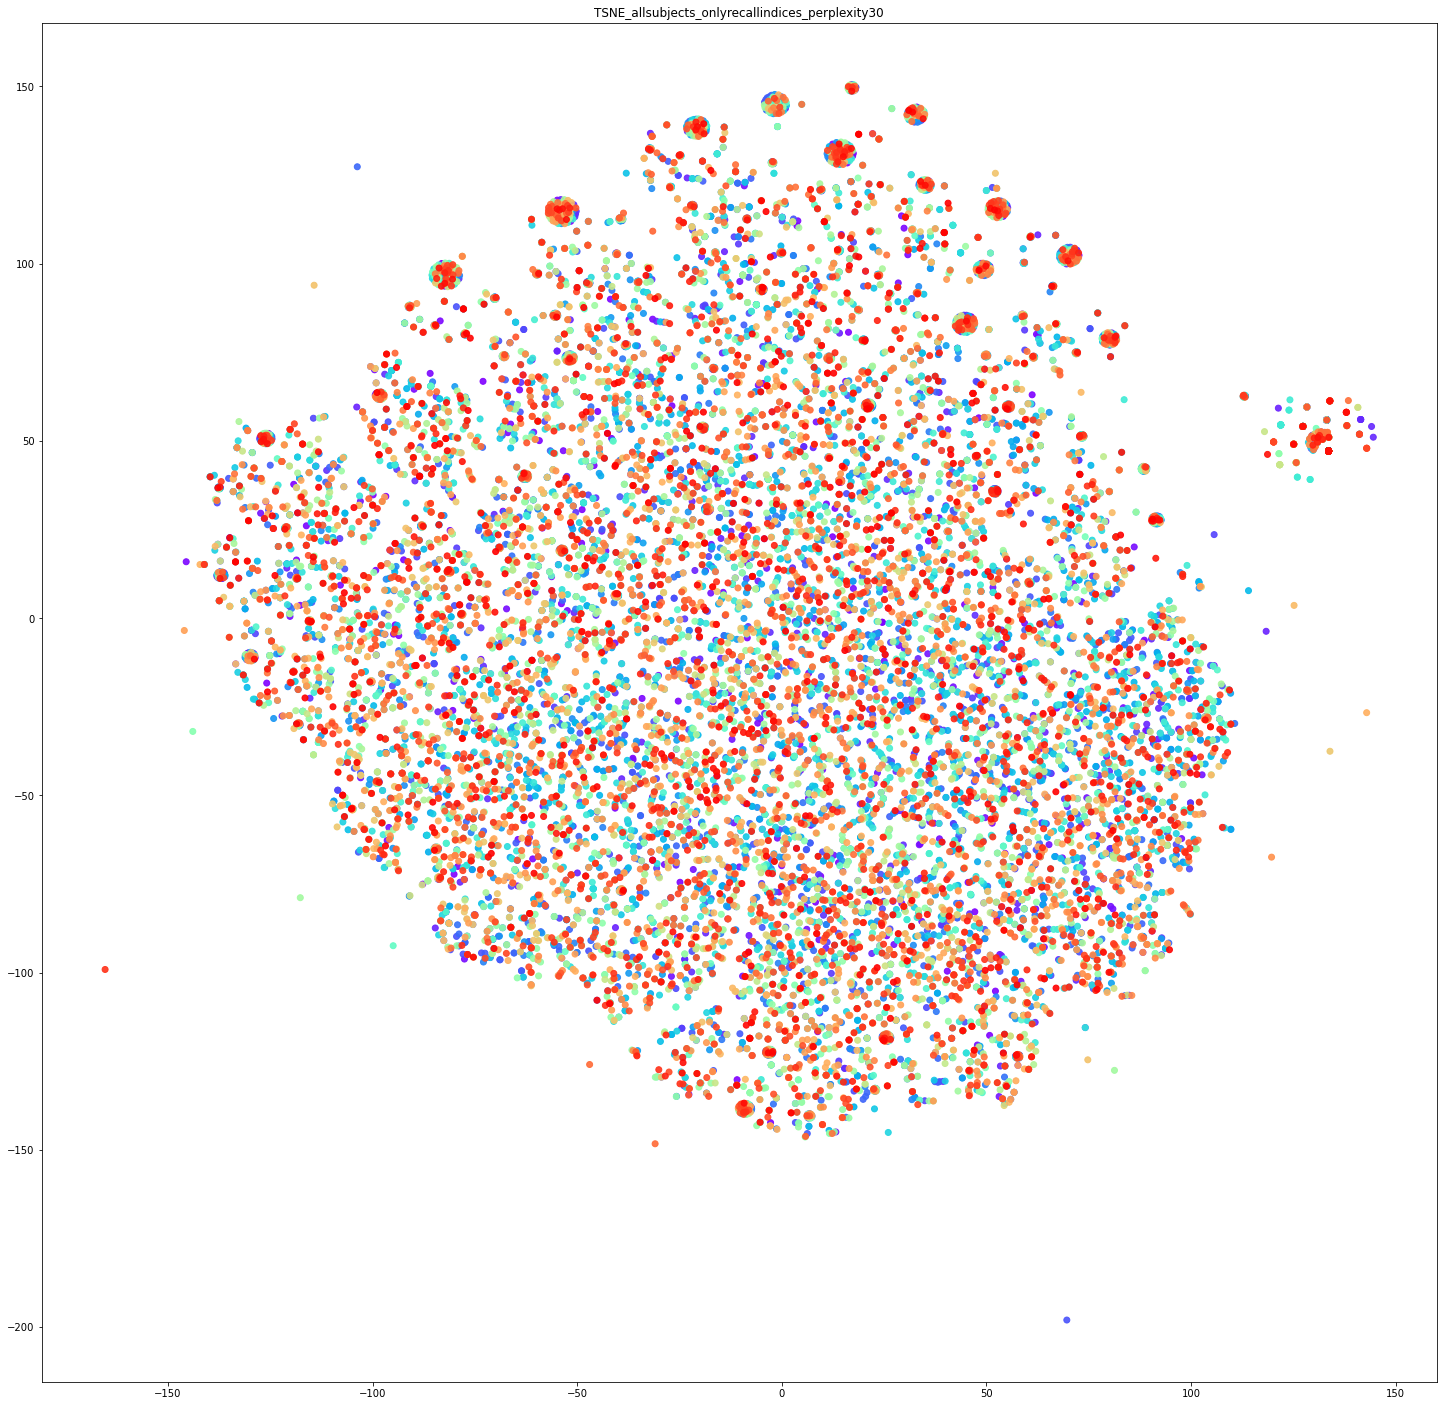

In [26]:
plt.figure(figsize=(25, 25))
plt.scatter(projections_tsne[:, 0],
            projections_tsne[:, 1], 
            c=label, cmap=matplotlib.colors.ListedColormap(colors),alpha=0.9)
plt.title("TSNE_allsubjects_onlyrecallindices_perplexity30")
plt.show()

In [ ]:
### selecting random 10 subjects 10 times to check stability
### we see few users have this pattern

In [27]:
iterations = 10

for i in range(10):
    all_subjects = df_Allsubjects.subjectIndex.unique()
    sample_subjects = random.choices(all_subjects, k=10)
    df_sample = df_Allsubjects[df_Allsubjects.subjectIndex.isin(sample_subjects)]
    print(i,"=",sample_subjects)
    
    X = df_sample.iloc[:,3:].values
    y = df_sample.iloc[:,0].values
    tsne = TSNE(n_components=2, perplexity=20, n_iter=5000)
    projections_tsne = tsne.fit_transform(X)
    
    label = y
    totalSubjects = df_sample.subjectIndex.nunique()
    colors = cm.rainbow(np.linspace(0, 1, totalSubjects))
    
    plt.figure(figsize=(20, 20))
    plt.scatter(projections_tsne[:, 0],
                projections_tsne[:, 1], 
                c=label, 
                cmap=matplotlib.colors.ListedColormap(colors),
                alpha=0.7)
    plt.title("TSNE_allsubjects_onlyrecallindices_perplexity20 for iter "+str(i))
    plt.show()

0 = [190, 68, 198, 118, 121, 284, 103, 195, 76, 89]


/Users/sidkoch/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/sidkoch/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


KeyboardInterrupt: 

### TASK2 - FOR TRIALS ====> recall index flags + recall order

In [28]:
### TRYING WITH JUST ALL subjects
data_json_list_subset = []
for i in data_json_list:
    if len(i)>0:
        data_json_list_subset.append(i)

### TRYING WITH JUST 10 subjects
# ids_subset = [267, 87, 151, 90, 122, 242, 110, 92, 241, 194]
# data_json_list_subset = []

# for i in data_json_list:
#     if len(i)>0:
#         if i["subjectIndex"] in ids_subset:
#             data_json_list_subset.append(i)

In [29]:
len(data_json_list_subset)

17335

In [30]:
bigList = []

for i in data_json_list_subset:
    smallList = [i["subjectIndex"] , i["sessionIndex"] , i["listIndex"]]
    recall_flags = [0]*16
    recall_indices = i["serialPositions_recallPhase"]
    recall_indices_unique = list(set(recall_indices))
    recall_order = []

    for j in recall_indices_unique:
        if j>=0:
            if j==0 or j==16:
                recall_flags[0]=1
            else:
                recall_flags[j]=1 
                    
    for j in recall_indices:
        if j>=0:
            if j==0 or j==16:
                if j not in recall_order:
                    recall_order.append(1)
            else:
                if j not in recall_order:
                    recall_order.append(j+1)                    
    
#     if len(recall_indices)>16:
#         print("\nLOOKS LIKE A BIG RECALL SEQUENCE = ",recall_indices)
#         print(recall_order)
#         print(i)
    
#     if len(recall_order)>16:
#         print("\nLOOKS LIKE A BIG RECALL ORDER = ",recall_indices)
#         print(recall_order)
#         print(i)   

    ### padding to be done if recall order is lesser than 16
    if len(recall_order)<16:
        pad_size = 16-len(recall_order)
        recall_order = recall_order + [0]*pad_size
    
    
    
    smallList += recall_flags
    smallList += recall_order
    bigList.append(smallList)
    
print(len(bigList),len(bigList[0]))    
    
cols = ['subjectIndex',
        'sessionIndex',
        'listIndex',
        'recalled_w1',
        'recalled_w2',
        'recalled_w3',
        'recalled_w4',
        'recalled_w5',
        'recalled_w6',
        'recalled_w7',
        'recalled_w8',
        'recalled_w9',
        'recalled_w10',
        'recalled_w11',
        'recalled_w12',
        'recalled_w13',
        'recalled_w14',
        'recalled_w15',
        'recalled_w16',
        'recall_order_1',
        'recall_order_2',    
        'recall_order_3',
        'recall_order_4',          
        'recall_order_5',
        'recall_order_6',    
        'recall_order_7',
        'recall_order_8',               
        'recall_order_9',
        'recall_order_10',    
        'recall_order_11',
        'recall_order_12',          
        'recall_order_13',
        'recall_order_14',    
        'recall_order_15',
        'recall_order_16']

df_Allsubjects = pd.DataFrame(bigList, columns = cols)

print(df_Allsubjects.shape)

17335 35
(17335, 35)


In [31]:
df_Allsubjects.head(3)

subjectIndex  sessionIndex  listIndex  recalled_w1  recalled_w2  \
0            63             1          0            1            1   
1            63             1          1            0            1   
2            63             1          2            0            1   

   recalled_w3  recalled_w4  recalled_w5  recalled_w6  recalled_w7  \
0            1            0            0            0            1   
1            0            0            0            0            0   
2            1            0            1            1            1   

   recalled_w8  recalled_w9  recalled_w10  recalled_w11  recalled_w12  \
0            0            0             1             0             0   
1            0            0             0             0             0   
2            0            0             1             0             0   

   recalled_w13  recalled_w14  recalled_w15  recalled_w16  recall_order_1  \
0             0             1             0             1              16   
1             1             1             0             1              16   
2             0             0             1             1              15   

   recall_order_2  recall_order_3  recall_order_4  recall_order_5  \
0              14               7               2               1   
1              14              13               2               0   
2               3               6               2              10   

   recall_order_6  recall_order_7  recall_order_8  recall_order_9  \
0              10               0               0               0   
1               0               0               0               0   
2               5               0               0               0   

   recall_order_10  recall_order_11  recall_order_12  recall_order_13  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   

   recall_order_14  recall_order_15  recall_order_16  
0                0                0                0  
1                0                0                0  
2                0                0                0

In [32]:
X = df_Allsubjects.iloc[:,3:].values
y = df_Allsubjects.iloc[:,0].values

In [113]:
tsne = TSNE(n_components=2, perplexity=30, n_iter=5000, verbose=3)

In [114]:
projections_tsne = tsne.fit_transform(X)

/Users/sidkoch/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/sidkoch/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 17335 samples in 0.002s...
[t-SNE] Computed neighbors for 17335 samples in 5.271s...
[t-SNE] Computed conditional probabilities for sample 1000 / 17335
[t-SNE] Computed conditional probabilities for sample 2000 / 17335
[t-SNE] Computed conditional probabilities for sample 3000 / 17335
[t-SNE] Computed conditional probabilities for sample 4000 / 17335
[t-SNE] Computed conditional probabilities for sample 5000 / 17335
[t-SNE] Computed conditional probabilities for sample 6000 / 17335
[t-SNE] Computed conditional probabilities for sample 7000 / 17335
[t-SNE] Computed conditional probabilities for sample 8000 / 17335
[t-SNE] Computed conditional probabilities for sample 9000 / 17335
[t-SNE] Computed conditional probabilities for sample 10000 / 17335
[t-SNE] Computed conditional probabilities for sample 11000 / 17335
[t-SNE] Computed conditional probabilities for sample 12000 / 17335
[t-SNE] Computed conditional probabilities for sam

In [115]:
type(projections_tsne)

numpy.ndarray

In [116]:
projections_tsne.shape

(17335, 2)

In [117]:
label = y
totalSubjects = df_Allsubjects.subjectIndex.nunique()
colors = cm.rainbow(np.linspace(0, 1, totalSubjects))

totalSubjects

186

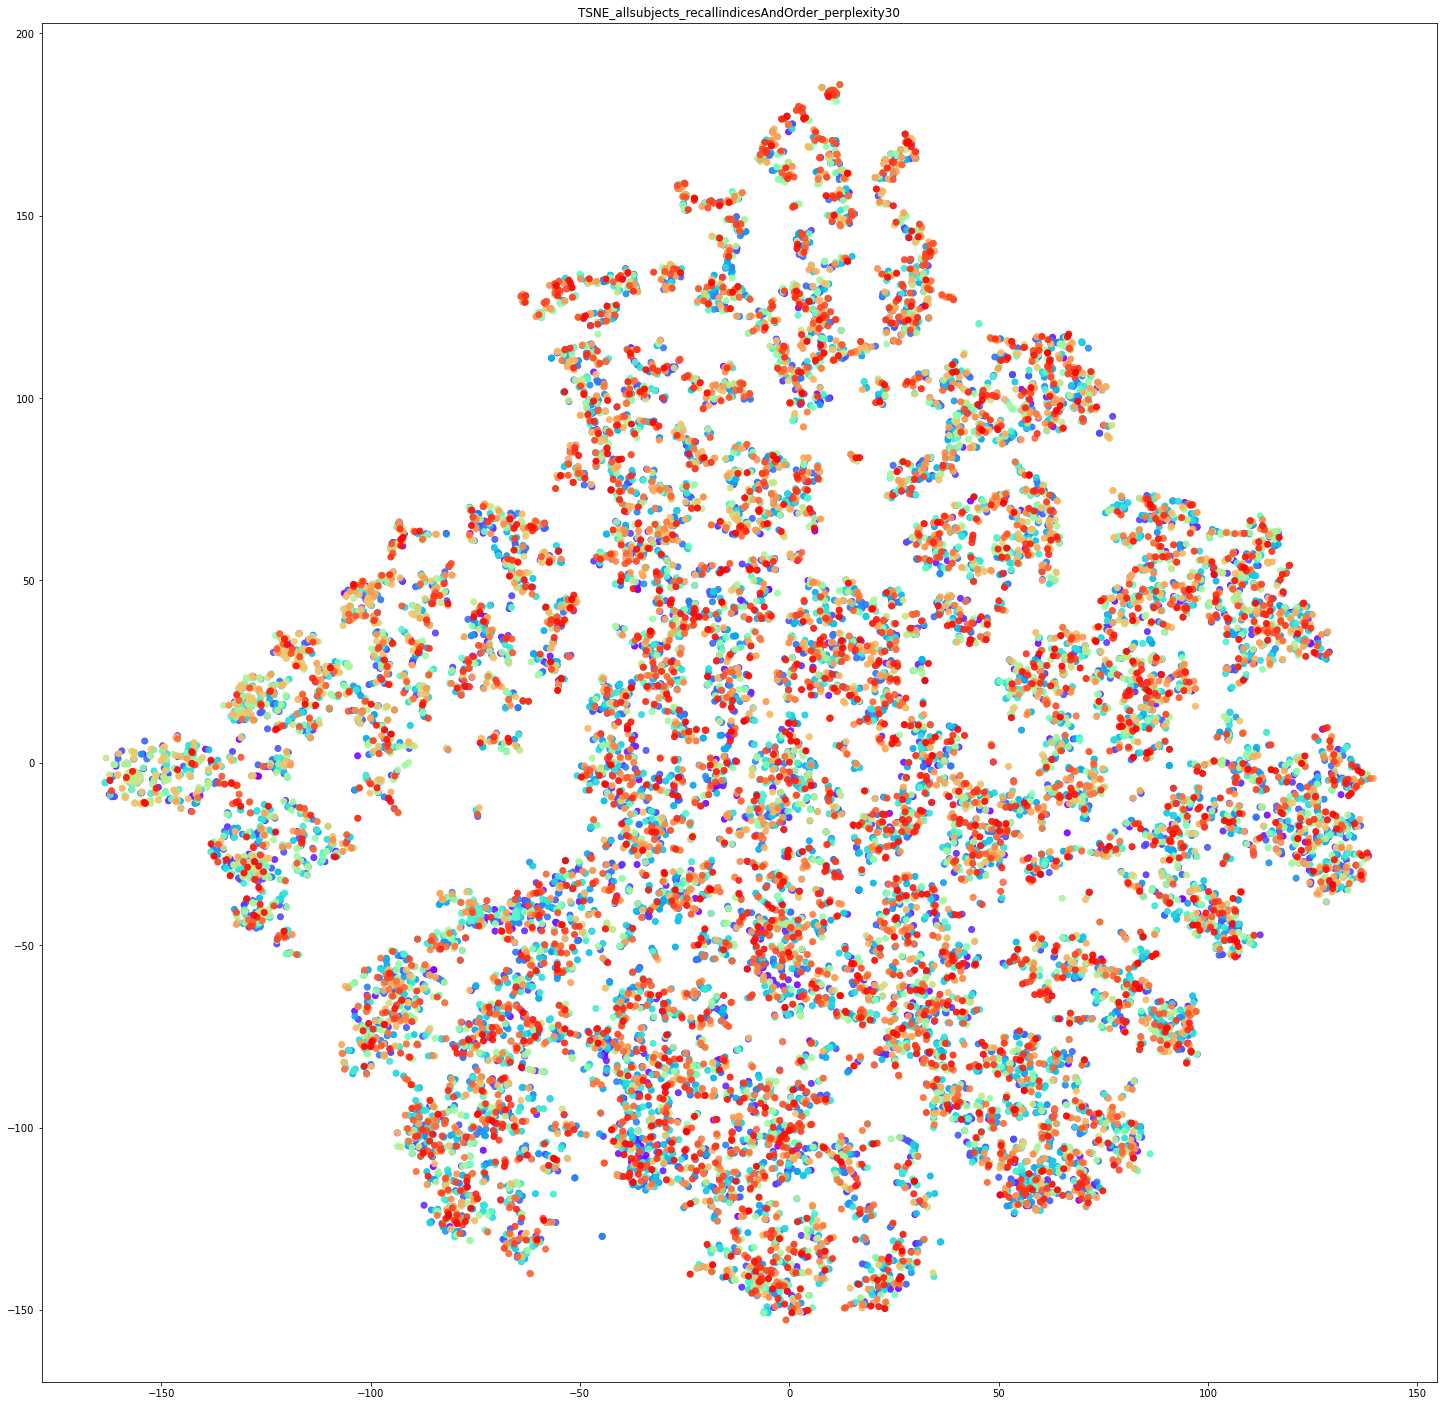

In [118]:
plt.figure(figsize=(25, 25))
plt.scatter(projections_tsne[:, 0],
            projections_tsne[:, 1], 
            c=label, cmap=matplotlib.colors.ListedColormap(colors),alpha=0.9)
plt.title("TSNE_allsubjects_recallindicesAndOrder_perplexity30")
plt.show()

In [112]:
### selecting random 10 subjects 10 times to check stability
### we see few users have this pattern of blob

0 = [281, 241, 113, 134, 202, 79, 278, 130, 81, 125]


/Users/sidkoch/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/sidkoch/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


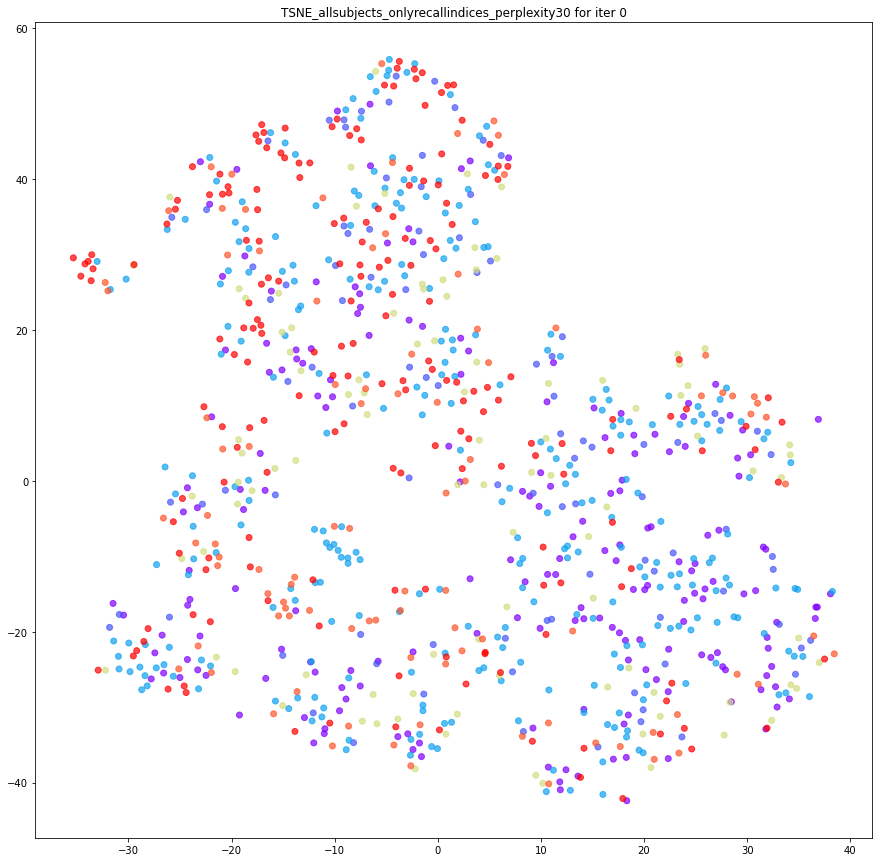

1 = [264, 132, 285, 237, 252, 207, 249, 137, 280, 274]


/Users/sidkoch/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/sidkoch/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


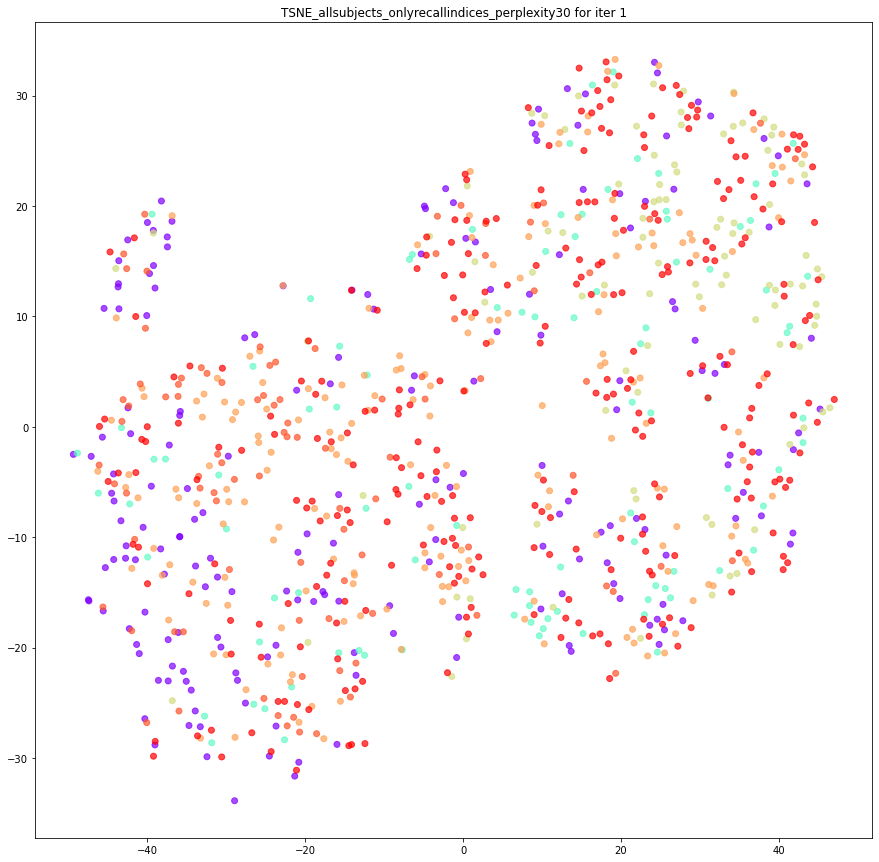

2 = [75, 245, 89, 281, 167, 239, 286, 77, 250, 74]


/Users/sidkoch/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/sidkoch/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


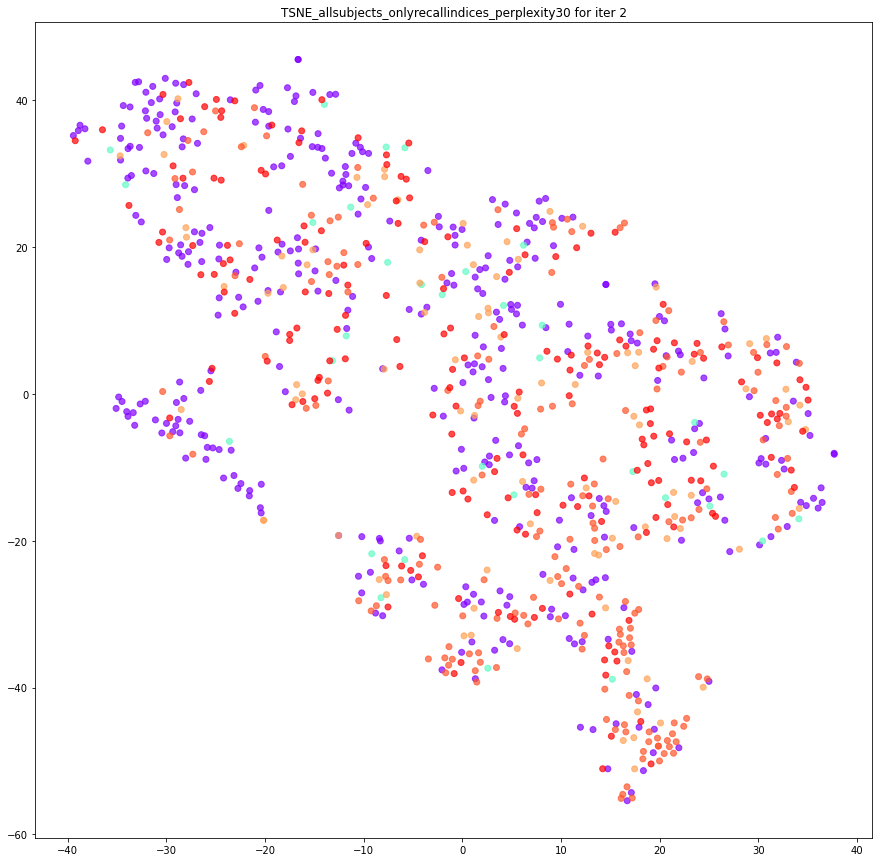

3 = [258, 88, 232, 87, 190, 70, 231, 184, 292, 87]


/Users/sidkoch/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/sidkoch/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


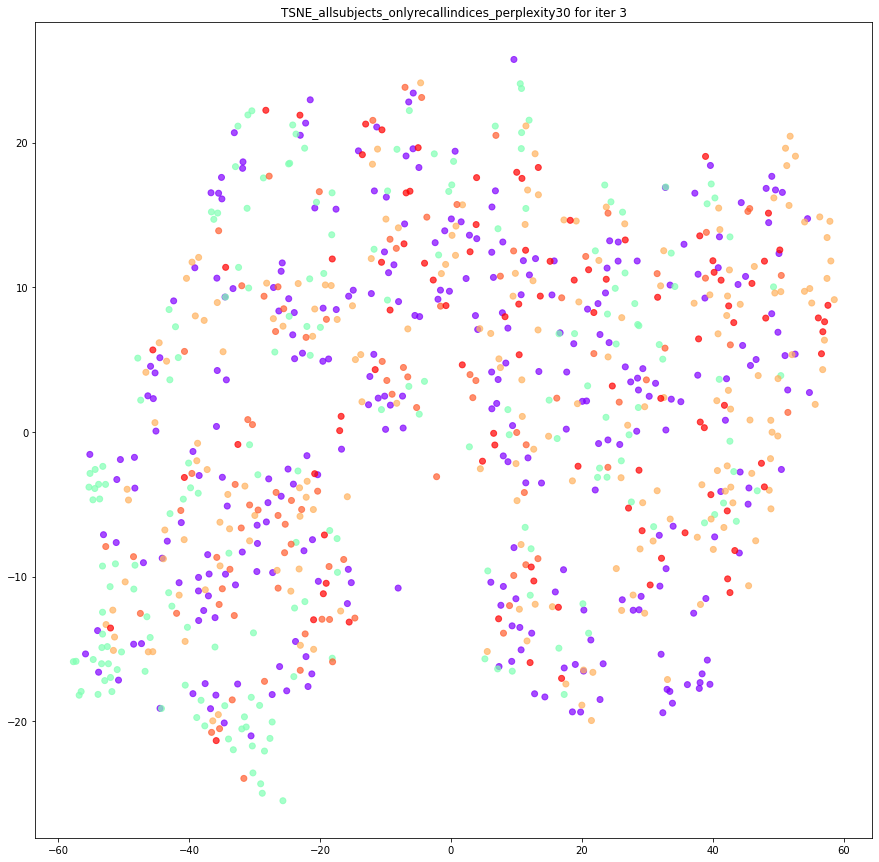

4 = [227, 112, 103, 199, 240, 134, 185, 112, 278, 135]


/Users/sidkoch/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/sidkoch/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


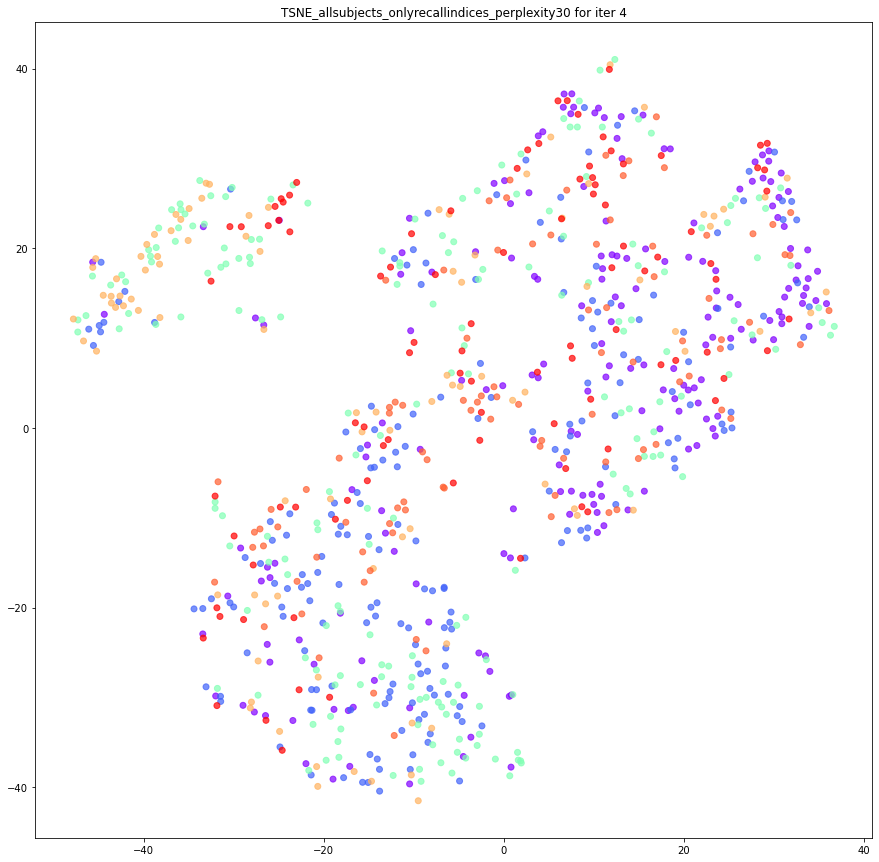

5 = [80, 114, 228, 123, 263, 243, 96, 260, 87, 121]


/Users/sidkoch/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/sidkoch/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


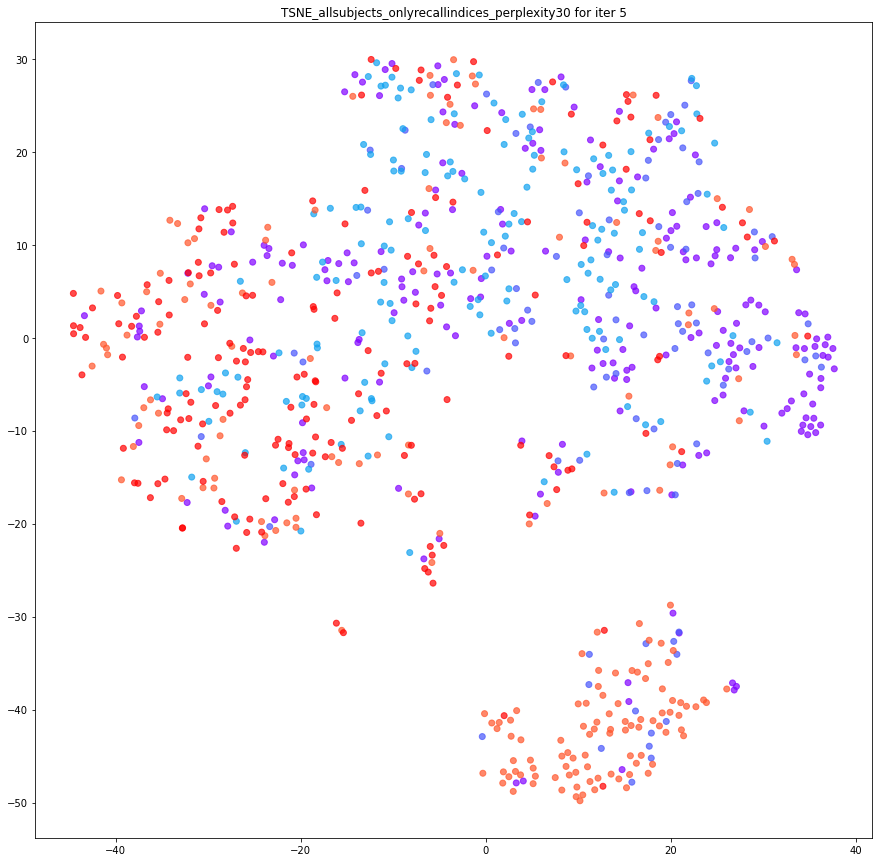

6 = [134, 75, 267, 271, 86, 239, 275, 81, 242, 104]


/Users/sidkoch/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/sidkoch/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


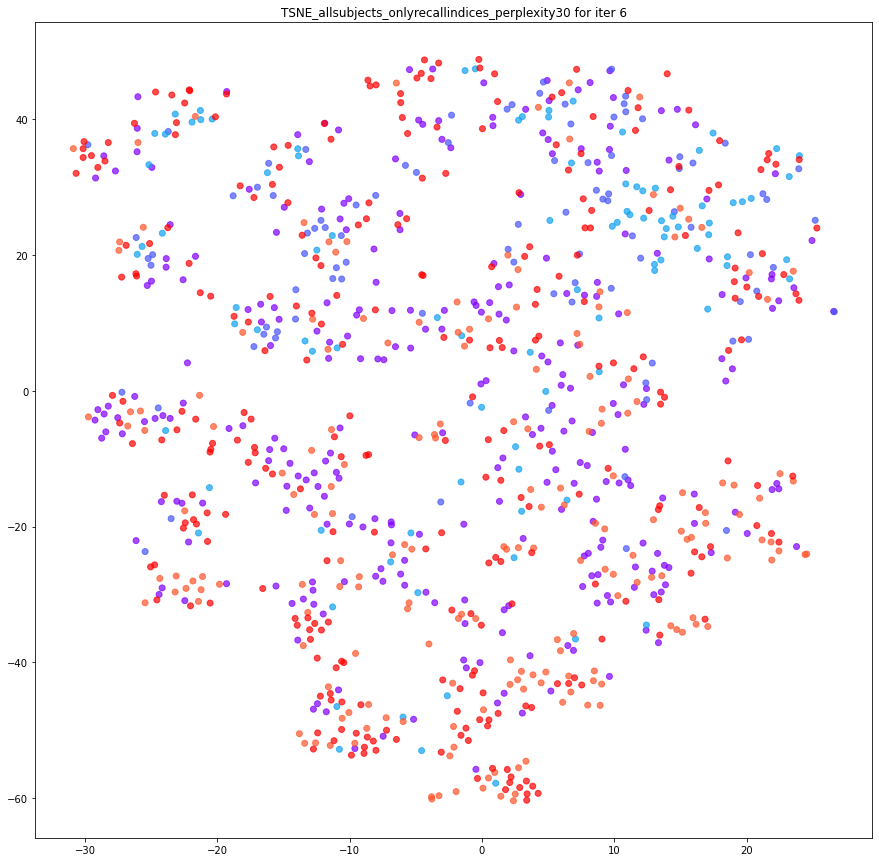

7 = [167, 65, 271, 201, 188, 234, 75, 64, 272, 246]


/Users/sidkoch/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/sidkoch/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


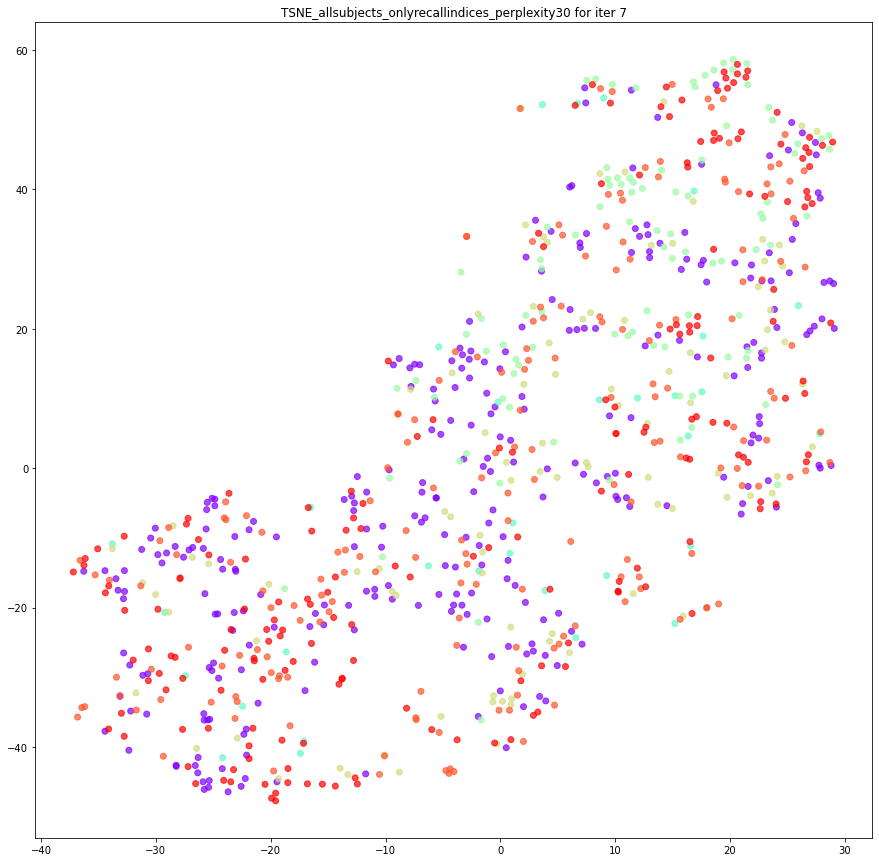

8 = [98, 140, 126, 289, 104, 214, 67, 118, 233, 69]


/Users/sidkoch/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/sidkoch/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


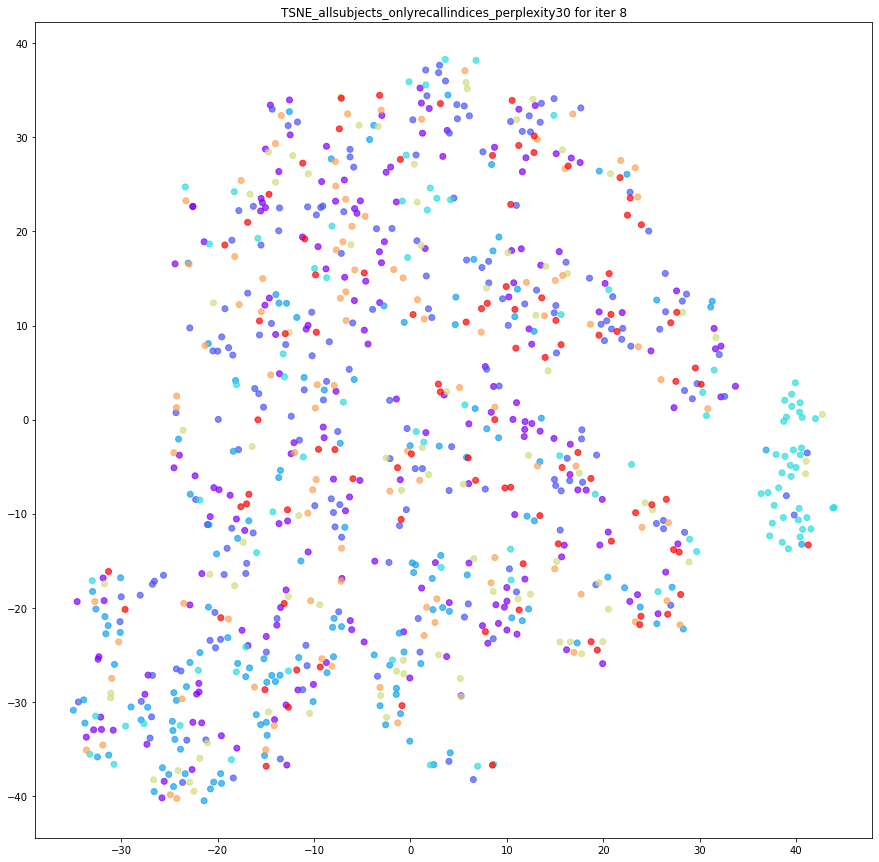

9 = [148, 153, 247, 193, 69, 254, 254, 119, 269, 97]


/Users/sidkoch/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/sidkoch/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


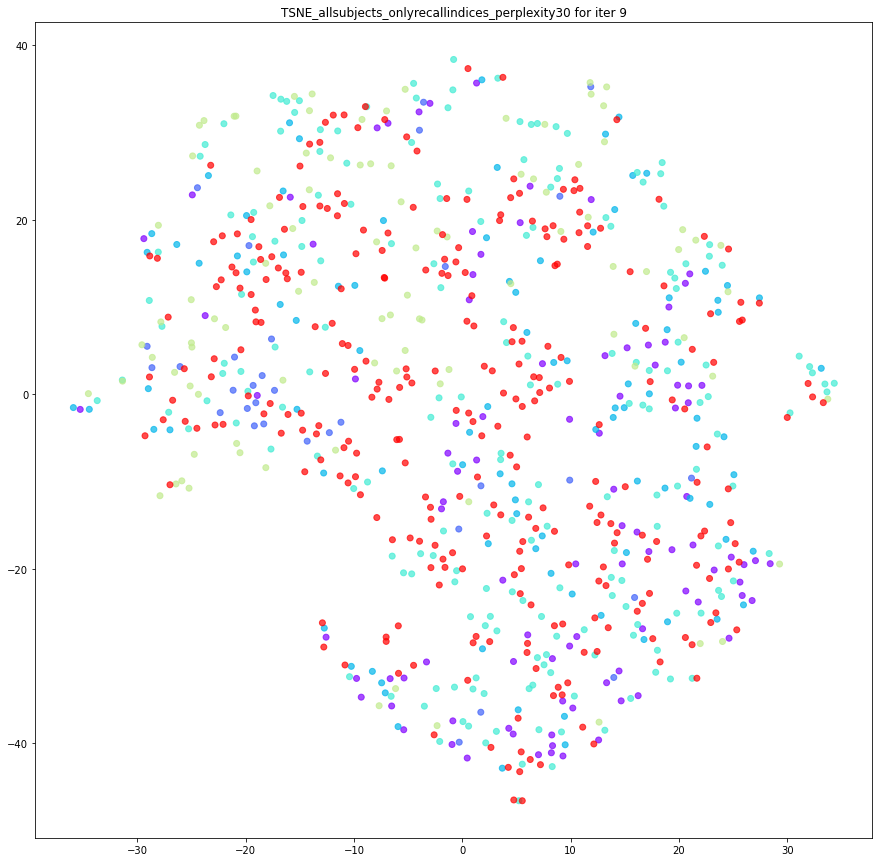

In [120]:
iterations = 10

for i in range(10):
    all_subjects = df_Allsubjects.subjectIndex.unique()
    sample_subjects = random.choices(all_subjects, k=10)
    df_sample = df_Allsubjects[df_Allsubjects.subjectIndex.isin(sample_subjects)]
    print(i,"=",sample_subjects)
    
    X = df_sample.iloc[:,3:].values
    y = df_sample.iloc[:,0].values
    tsne = TSNE(n_components=2, perplexity=30, n_iter=5000)
    projections_tsne = tsne.fit_transform(X)
    
    label = y
    totalSubjects = df_sample.subjectIndex.nunique()
    colors = cm.rainbow(np.linspace(0, 1, totalSubjects))
    
    plt.figure(figsize=(15, 15))
    plt.scatter(projections_tsne[:, 0],
                projections_tsne[:, 1], 
                c=label, 
                cmap=matplotlib.colors.ListedColormap(colors),
                alpha=0.7)
    plt.title("TSNE_allsubjects_onlyrecallindices_perplexity30 for iter "+str(i))
    plt.show()